In [2]:
import pandas, numpy, seaborn
import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':10, 'figure.figsize':(12, 8)})

In [3]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

In [7]:
%%time
# DL data
path = input_file_directory + "/mefs/mef_mitotracker/mef_mitotracker_exp1.csv"
df_mitotracker = pandas.read_csv(path, sep = ";")
df_mitotracker = df_mitotracker.apply(lambda x: x.str.replace(',','.'))

df_mitotracker.iloc[:,1:8] = df_mitotracker.iloc[:,1:8].apply(pandas.to_numeric, errors='coerce', axis=1)
df_mitotracker.columns = "condition", "WT MEF", "ATG7-/-", "ATG7-/- +dox", "ATG7(1)", "dVSR(1)", "ATG7(2)", "dVSR(2)"


path = 'ATG7/Mitotracker/'
df_mitotracker.to_csv(output_file_directory+path+'number_mito_exp1.csv', header=True, index=False, sep=',')

df_mitotracker

Wall time: 10.9 ms


,condition,WT MEF,ATG7-/-,ATG7-/- +dox,ATG7(1),dVSR(1),ATG7(2),dVSR(2)
0,DMSO+FCCP,2062.98,1972.86,1994.34,2049.81,1804.97,2049.74,1792.67
1,DMSO+FCCP,2022.27,1862.62,1735.8,1659.61,1879.14,1849.36,1805.66
2,DMSO+FCCP,2138.53,1865.05,1880.32,1877.96,1894.89,1921.4,1761.55
3,DMSO+FCCP,2048.61,1884.85,1913.32,1966.55,1869.28,2001.76,1867.56
4,BAF+FCCP,2128.79,1771.32,2175.69,1795.88,2136.42,1853.22,2111.14
5,BAF+FCCP,2103.21,1791.59,2079.72,1830.32,2078.06,1849.5,2073.33
6,BAF+FCCP,1964.4,1901.81,1925.38,1846.05,2063.66,1816.65,2091.49
7,BAF+FCCP,1805.01,1785.59,1760.49,1769.11,1753.66,1851.84,1834.49


findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


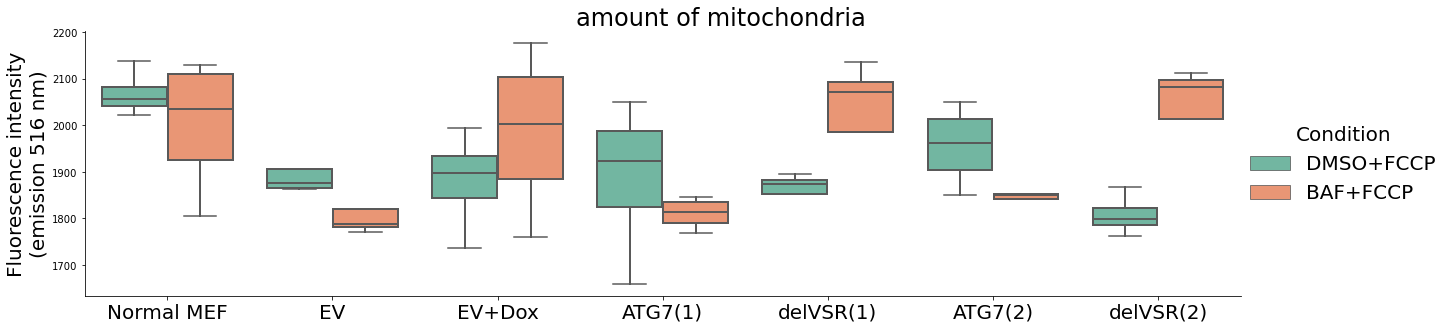

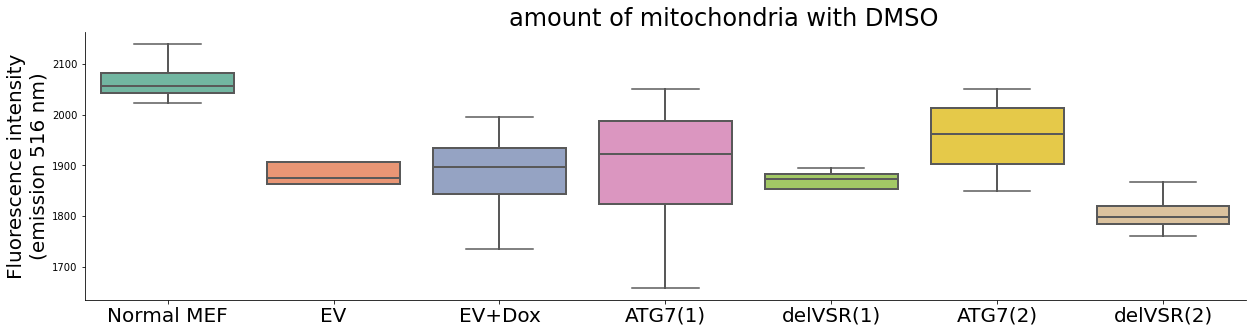

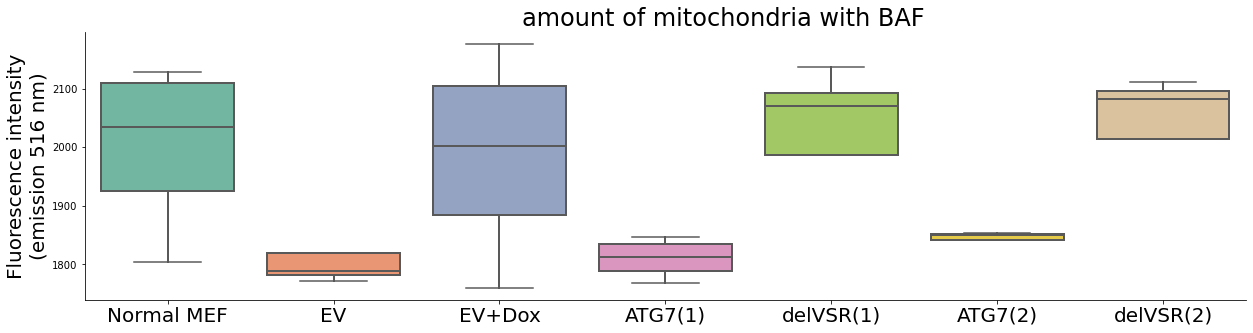

In [49]:
# Distribution: Data preparation + graph
all_data = [[df_mitotracker, 'amount of mitochondria', '(emission 516 nm)']]

for data_ in all_data:
    Data = data_[0]
    info = data_[1]
    info_fluo = data_[2]
    
    shape = Data.shape
    shape = shape[0]
#     print(shape)

    #select the sample type column
    media_condition = {'condition':[Data.iloc[:,0][i]
      for i in range(0, shape)]}

    #convert to df, and copy it 3 times
    media_conditiondf = pandas.DataFrame(media_condition)
    media_conditiondf = pandas.concat([media_conditiondf,media_conditiondf,media_conditiondf,
                                      media_conditiondf,media_conditiondf,media_conditiondf,
                                      media_conditiondf])

    media_conditiondf.reset_index(drop=True, inplace=True)

    # Y for expression value 
    y = {'y':[Data.iloc[:,j][i]
      for j in range(1,8)
        for i in range(0, shape)]}

    #create df with Y 
    data_distrib = pandas.DataFrame(y).astype(float)

    # X for ATG7/iso1/iso2                              
    data_distrib.loc[:shape,'x'] = 'Normal MEF'
    data_distrib.loc[shape: shape*2,'x'] = 'EV'
    data_distrib.loc[shape*2: shape*3,'x'] = 'EV+Dox'
    data_distrib.loc[shape*3: shape*4,'x'] = 'ATG7(1)'
    data_distrib.loc[shape*4: shape*5,'x'] = 'delVSR(1)'
    data_distrib.loc[shape*5: shape*6,'x'] = 'ATG7(2)'
    data_distrib.loc[shape*6:,'x'] = 'delVSR(2)'

    # Will be used for Hue
    data_distrib['Condition'] = media_conditiondf['condition']
    
    #graph to see BAF + DMSO in the same graph. Useful to see BAF effect
    seaborn.catplot(x="x", y="y", hue="Condition", aspect = 3.5, kind="box", palette = 'Set2', data = data_distrib, 
                  boxprops={'lw':2}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False)

    plt.ylabel('Fluorescence intensity\n' + info_fluo)
    plt.xlabel('')
    plt.title(info, x=.55)
    print()

    #separation of DMSO and BAF
    df_dmso = data_distrib[data_distrib['Condition'].str.startswith('DMSO')]
    df2_baf = data_distrib[data_distrib['Condition'].str.startswith('BAF')]
    
    dfs_conditions = [[df_dmso, ' with DMSO'], [df2_baf, ' with BAF']]
    for df_ in dfs_conditions:
        data_drug = df_[0]
        drug_info = df_[1]
    
        #graph with BAF or DMSO treatment separatly to have a better view of the cell lines
        seaborn.catplot(x="x", y="y", aspect = 3.5, kind="box", palette = 'Set2', data = data_drug,
                        boxprops={'lw':2}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False)

        plt.ylabel('Fluorescence intensity\n' + info_fluo)
        plt.xlabel('')
        plt.title(info+drug_info, x=.55)
        print()

# print()


In [52]:
#Distribution: Stats for all 
all_data = [[df_mitotracker, 'amount of mitochondria', '(emission 516 nm)']]

column_name = df_mitotracker.keys()
for data_ in all_data:
    Data = data_[0]
    info = data_[1]
    info_fluo = data_[2]  
    print(info)
    
    #separation of DMSO and BAF
    df_dmso = Data[Data['condition'].str.startswith('DMSO')]
    df2_baf = Data[Data['condition'].str.startswith('BAF')]

    dfs_conditions = [[df_dmso, 'with DMSO'], [df2_baf, 'with BAF']]
    for df_ in dfs_conditions:
        data_drug = df_[0]
        drug_info = df_[1]
        print(drug_info.upper())
        
        # Mann-Whitney analysis 
        #EV vs WT1
        statistic, pvalue = scipy.stats.mannwhitneyu(data_drug[column_name[3]], data_drug[column_name[4]])
        Pvalue = "{:.3E}".format(pvalue)
        print(column_name[3], "and", column_name[4], drug_info, 'pvalue is', Pvalue)
        
        #EV vs WT1
        statistic, pvalue = scipy.stats.mannwhitneyu(data_drug[column_name[3]], data_drug[column_name[6]])
        Pvalue = "{:.3E}".format(pvalue)
        print(column_name[3], "and", column_name[6], drug_info, 'pvalue is', Pvalue)
        
         #EV vs WT1
        statistic, pvalue = scipy.stats.mannwhitneyu(data_drug[column_name[4]], data_drug[column_name[6]])
        Pvalue = "{:.3E}".format(pvalue)
        print(column_name[4], "and", column_name[6], drug_info, 'pvalue is', Pvalue)
        print()

amount of mitochondria
WITH DMSO
ev_dox and wt1 with DMSO pvalue is 4.426E-01
ev_dox and wt2 with DMSO pvalue is 1.562E-01
wt1 and wt2 with DMSO pvalue is 4.426E-01

WITH BAF
ev_dox and wt1 with BAF pvalue is 1.562E-01
ev_dox and wt2 with BAF pvalue is 1.562E-01
wt1 and wt2 with BAF pvalue is 5.618E-02

